In [57]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
from warnings import filterwarnings
filterwarnings('ignore')

In [59]:
path = r"C:\Users\C S\Downloads\BreastCancer.csv"

In [60]:
bcan  =  pd.read_csv(path)

In [61]:
# basic Checks 

In [62]:
bcan.head()

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,2,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,3,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,4,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,5,1017023,4,1,1,3,2,1.0,3,1,1,benign


In [63]:
bcan.tail()

,Unnamed: 0,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
694,695,776715,3,1,1,1,3,2.0,1,1,1,benign
695,696,841769,2,1,1,1,2,1.0,1,1,1,benign
696,697,888820,5,10,10,3,7,3.0,8,10,2,malignant
697,698,897471,4,8,6,4,3,4.0,10,6,1,malignant
698,699,897471,4,8,8,5,4,5.0,10,4,1,malignant


In [64]:
bcan.shape

(699, 12)

In [65]:
bcan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       699 non-null    int64  
 1   Id               699 non-null    int64  
 2   Cl.thickness     699 non-null    int64  
 3   Cell.size        699 non-null    int64  
 4   Cell.shape       699 non-null    int64  
 5   Marg.adhesion    699 non-null    int64  
 6   Epith.c.size     699 non-null    int64  
 7   Bare.nuclei      683 non-null    float64
 8   Bl.cromatin      699 non-null    int64  
 9   Normal.nucleoli  699 non-null    int64  
 10  Mitoses          699 non-null    int64  
 11  Class            699 non-null    object 
dtypes: float64(1), int64(10), object(1)
memory usage: 65.7+ KB


In [66]:
bcan.isnull().sum()

Unnamed: 0          0
Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [67]:
bcan.duplicated().sum()

np.int64(0)

In [68]:
# drop unnecessary columns
bcan.columns

Index(['Unnamed: 0', 'Id', 'Cl.thickness', 'Cell.size', 'Cell.shape',
       'Marg.adhesion', 'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin',
       'Normal.nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [69]:
bcan.drop(['Unnamed: 0', 'Id'] , axis  = 1  , inplace  =  True)

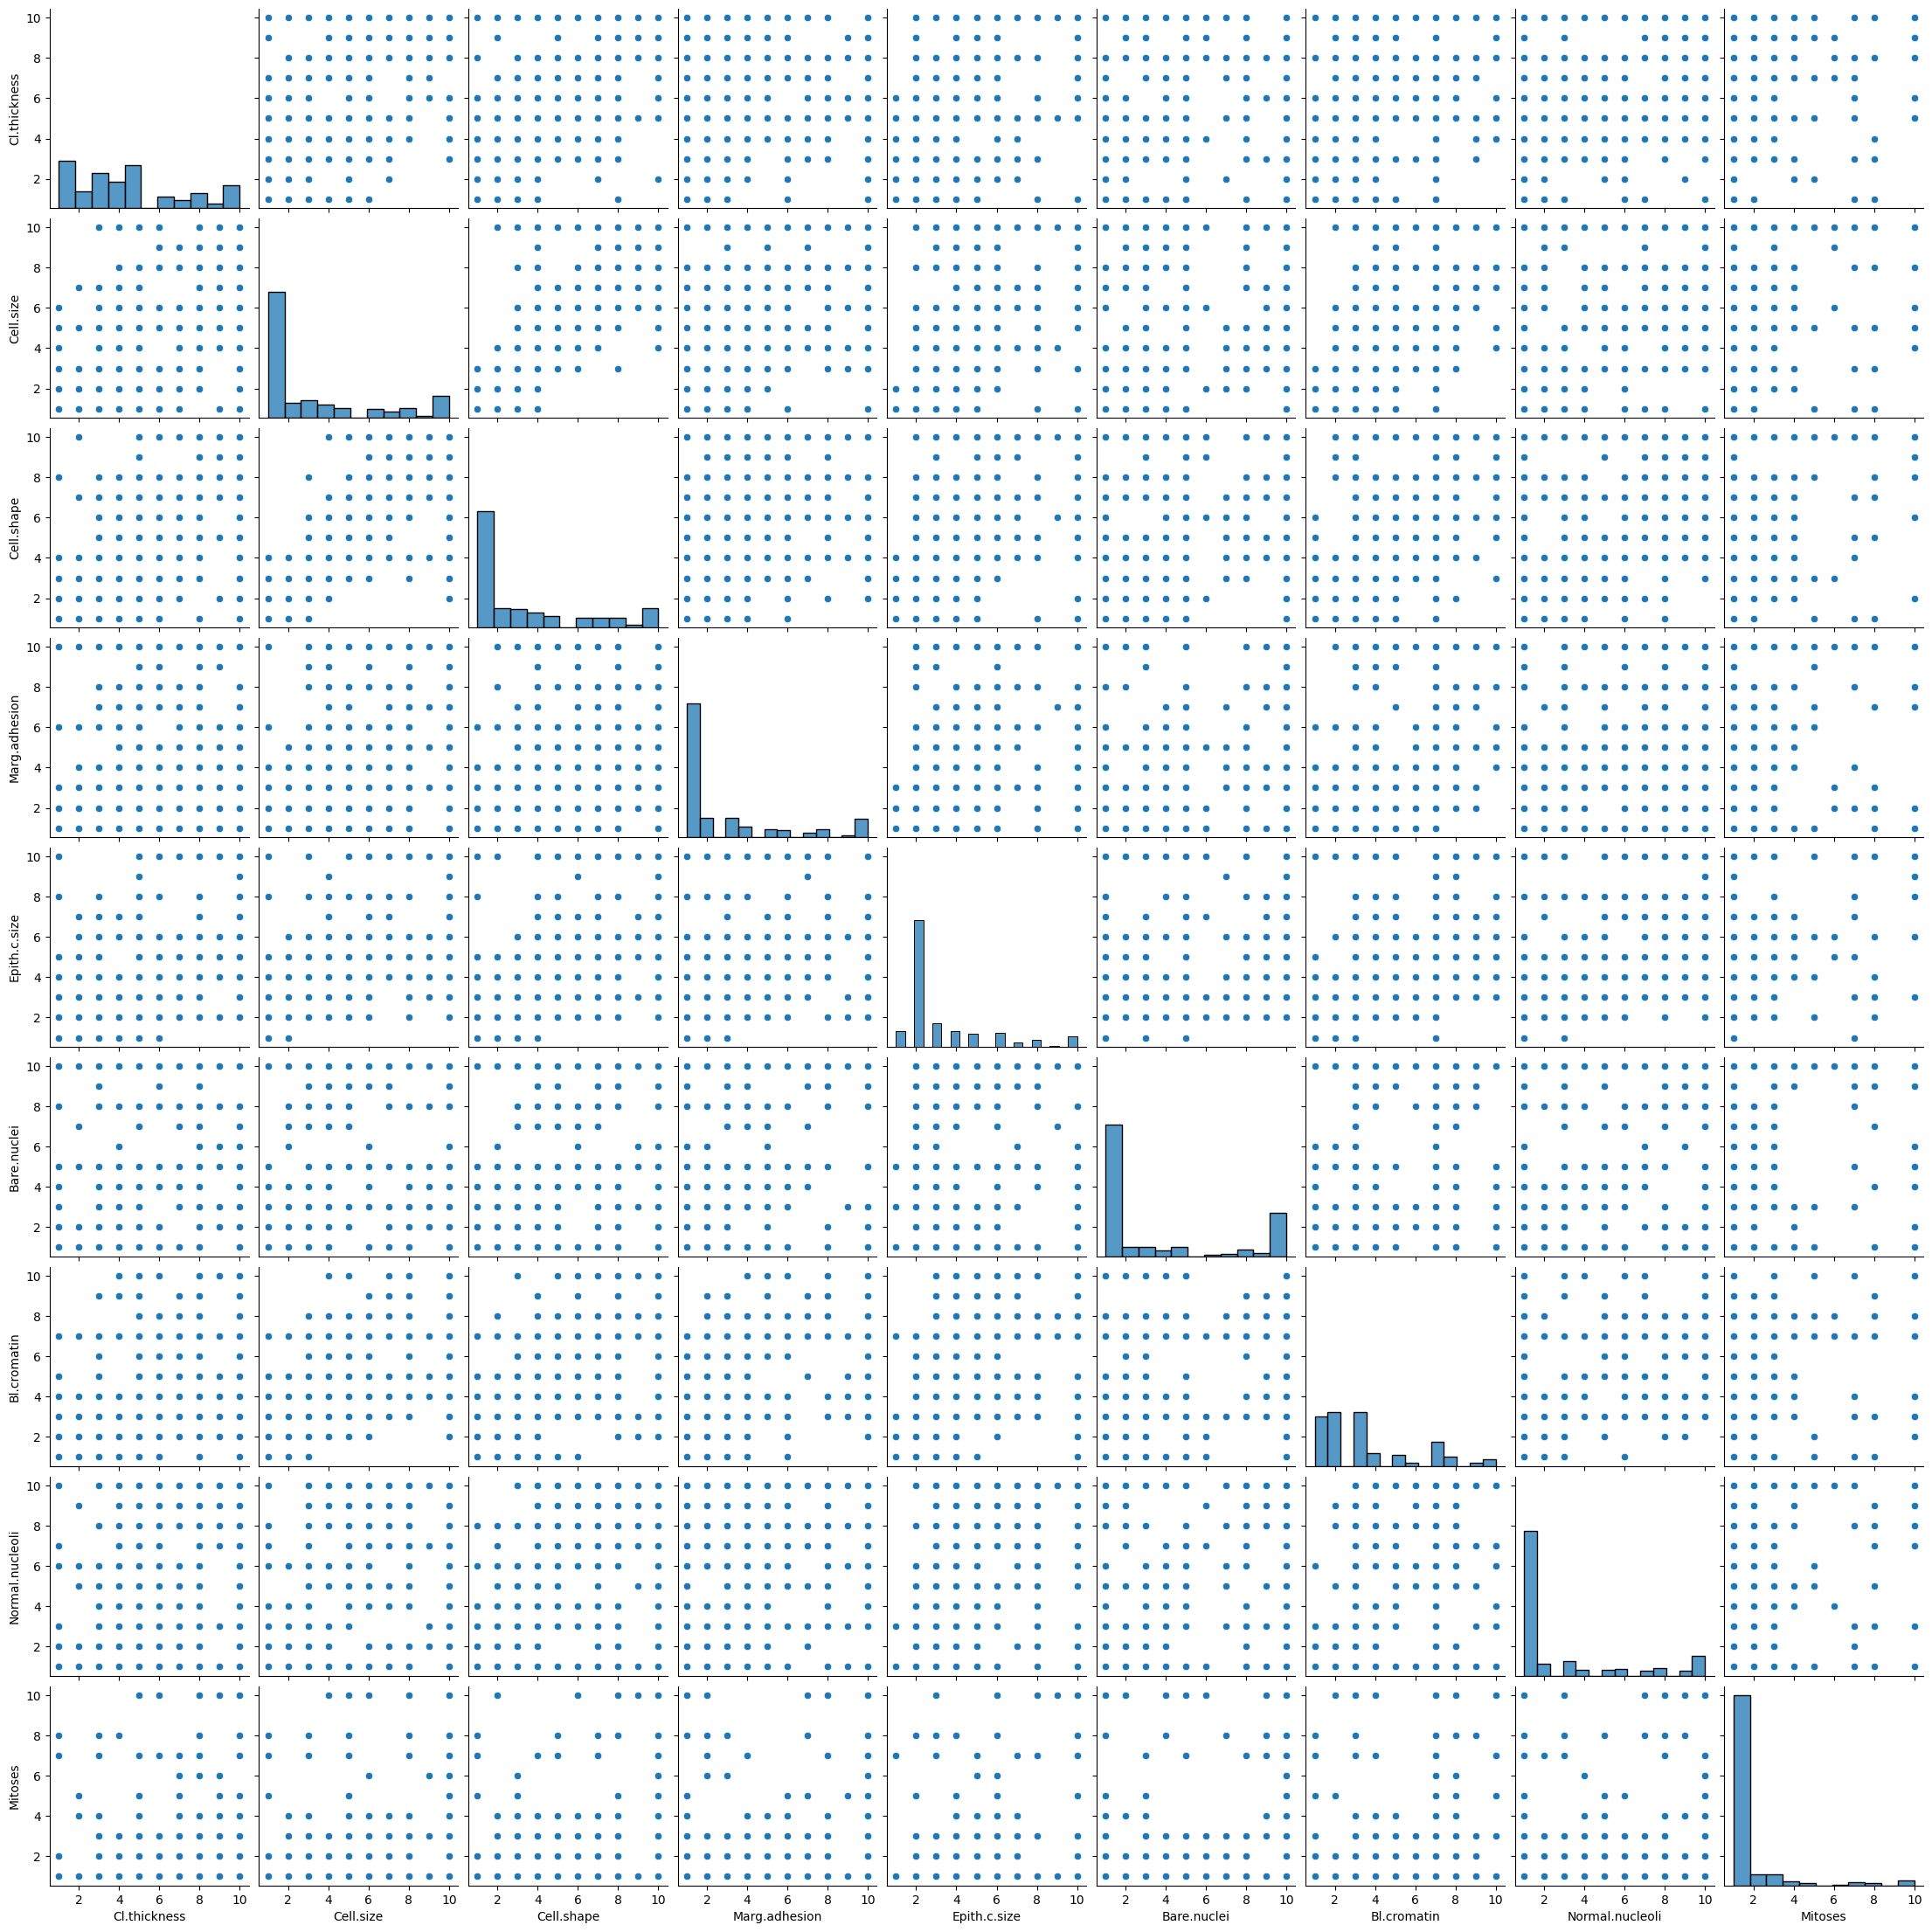

In [70]:
sns.pairplot(bcan)

In [71]:
# value counts for dependent data
bcan['Class'].value_counts()


Class
benign       458
malignant    241
Name: count, dtype: int64

In [72]:
bcan.dtypes

Cl.thickness         int64
Cell.size            int64
Cell.shape           int64
Marg.adhesion        int64
Epith.c.size         int64
Bare.nuclei        float64
Bl.cromatin          int64
Normal.nucleoli      int64
Mitoses              int64
Class               object
dtype: object

In [73]:
bcan.describe().T

,count,mean,std,min,25%,50%,75%,max
Cl.thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Cell.size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Cell.shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marg.adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Epith.c.size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bare.nuclei,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
Bl.cromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Normal.nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0


In [74]:
# seperate depedent and independent column
x  =  bcan.drop(['Class'] , axis =1 )
y  = bcan['Class']

In [75]:
# handel missing data
x.columns

Index(['Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion',
       'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli',
       'Mitoses'],
      dtype='object')

In [76]:
bcan['Bare.nuclei'].fillna(bcan['Bare.nuclei'].mean() , inplace =  True)

In [77]:
bcan.isnull().sum()

Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

In [78]:
bcan['Class'].unique()

array(['benign', 'malignant'], dtype=object)

In [79]:
# converting dependent data in categorical data
bcan.Class.replace({'benign' : 0 , 'malignant':1 } , inplace =  True)

### feature scaling is necessary  ?
- feature  scaling is not necessary 
- because we create classes on the basis of original 
- Data  and not assigning any weights to variables

In [80]:
x.head()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [81]:
from sklearn.model_selection import train_test_split

In [82]:
# train test split
x_train ,   x_test ,y_train ,  y_test =  train_test_split(x ,  y  ,
                                            test_size  =0.2 , 
                                            random_state  = 34) 

In [27]:
# import all required models and techniques
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [28]:
DT  =  DecisionTreeClassifier(criterion= 'gini')
DT.fit(x_train  , y_train)

DecisionTreeClassifier()

In [29]:
DT.score(x_train  , y_train)

1.0

In [30]:
# training Evaluation 
y_train_pred  = DT.predict(x_train)

In [31]:
from sklearn.metrics import recall_score , accuracy_score , \
precision_score , \
f1_score , classification_report , confusion_matrix

In [32]:
confusion_matrix(y_train  , y_train_pred)

array([[365,   0],
       [  0, 194]])

In [33]:
# training evaluation
print('accuracy' ,  accuracy_score(y_train , y_train_pred))
print('recall' ,  recall_score(y_train , y_train_pred))
print('precision' ,  precision_score(y_train , y_train_pred))
print('f1_score' ,  f1_score(y_train , y_train_pred))
print('report' , classification_report(y_train , y_train_pred))


accuracy 1.0
recall 1.0
precision 1.0
f1_score 1.0
report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       365
           1       1.00      1.00      1.00       194

    accuracy                           1.00       559
   macro avg       1.00      1.00      1.00       559
weighted avg       1.00      1.00      1.00       559



## Testing Evaluation



In [34]:
y_test_pred  = DT.predict(x_test)

In [35]:
# training evaluation
print('accuracy' ,  accuracy_score(y_test , y_test_pred))
print('recall' ,  recall_score(y_test , y_test_pred))
print('precision' ,  precision_score(y_test , y_test_pred))
print('f1_score' ,  f1_score(y_test , y_test_pred))
print('report' , classification_report(y_test , y_test_pred))


accuracy 0.9571428571428572
recall 0.9574468085106383
precision 0.9183673469387755
f1_score 0.9375
report               precision    recall  f1-score   support

           0       0.98      0.96      0.97        93
           1       0.92      0.96      0.94        47

    accuracy                           0.96       140
   macro avg       0.95      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140



In [36]:
# Random Forest 
RF  = RandomForestClassifier(n_estimators= 50 )

In [37]:
RF.fit(x_train , y_train)
RF.score(x_train , y_train)

1.0

In [ ]:
y_train.shape


(559,)

In [40]:
# training evaluation
RF_train_pred  =  RF.predict(x_train)
#print('accuracy' ,  accuracy_score(y_train , RF_train_pred))
print('recall' ,  recall_score(y_train , RF_train_pred))
print('precision' ,  precision_score(y_train , RF_train_pred))
print('f1_score' ,  f1_score(y_train , RF_train_pred))
print('report' , classification_report(y_train , RF_train_pred))


recall 1.0
precision 1.0
f1_score 1.0
report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       365
           1       1.00      1.00      1.00       194

    accuracy                           1.00       559
   macro avg       1.00      1.00      1.00       559
weighted avg       1.00      1.00      1.00       559



In [41]:
# training evaluation
RF_test_pred  =  RF.predict(x_test)
print('accuracy' ,  accuracy_score(y_test , RF_test_pred))
print('recall' ,  recall_score(y_test , RF_test_pred))
print('precision' ,  precision_score(y_test , RF_test_pred))
print('f1_score' ,  f1_score(y_test , RF_test_pred))
print('report' , classification_report(y_test , RF_test_pred))


accuracy 0.9642857142857143
recall 0.9574468085106383
precision 0.9375
f1_score 0.9473684210526315
report               precision    recall  f1-score   support

           0       0.98      0.97      0.97        93
           1       0.94      0.96      0.95        47

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



In [48]:
# cross validation score
from sklearn.model_selection import cross_val_score
cros_val  =  cross_val_score(DT , x_train , y_train  , cv  =  3)


In [44]:
cros_val.mean()

np.float64(0.9337875912828474)

In [45]:
cros_val.std()

np.float64(0.01419671392836971)

In [51]:
# # training evaluation
# cv_train_pred  =  cros_val.predict(x_train)
# #print('accuracy' ,  accuracy_score(y_train , cv_train_pred))
# print('recall' ,  recall_score(y_train , cv_train_pred))
# print('precision' ,  precision_score(y_train , cv_train_pred))
# print('f1_score' ,  f1_score(y_train , cv_train_pred))
# print('report' , classification_report(y_train , cv_train_pred))


In [53]:
gb  =  GradientBoostingClassifier(learning_rate= 0.2 , n_estimators= 50 )

In [86]:
x_train.isnull().sum()
x.isnull().sum()

Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
dtype: int64

In [85]:
x['Bare.nuclei'] = x['Bare.nuclei'].fillna(x['Bare.nuclei'].mean())

In [87]:
x_train['Bare.nuclei'] = x_train['Bare.nuclei'].fillna(x_train['Bare.nuclei'].mean())

In [88]:
gb.fit(x_train , y_train)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=50)

In [89]:
gb.score(x_train , y_train)

1.0

In [90]:
# training evaluation
gb_train_pred  =  gb.predict(x_train)
print('accuracy' ,  accuracy_score(y_train , gb_train_pred ))
print('recall' ,  recall_score(y_train , gb_train_pred ))
print('precision' ,  precision_score(y_train , gb_train_pred ))
print('f1_score' ,  f1_score(y_train , gb_train_pred ))
print('report' , classification_report(y_train , gb_train_pred ))


accuracy 1.0
recall 1.0
precision 1.0
f1_score 1.0
report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       365
           1       1.00      1.00      1.00       194

    accuracy                           1.00       559
   macro avg       1.00      1.00      1.00       559
weighted avg       1.00      1.00      1.00       559



In [91]:
x_test.isnull().sum()

Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        6
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
dtype: int64

In [92]:
x_test['Bare.nuclei'] = x_test['Bare.nuclei'].fillna(x_test['Bare.nuclei'].mean())

In [ ]:
# testing evaluation
gb_test_pred  =  gb.predict(x_test)
print('accuracy' ,  accuracy_score(y_test , gb_test_pred  ))
print('recall' ,  recall_score(y_test , gb_test_pred  ))
print('precision' ,  precision_score(y_test , gb_test_pred  ))
print('f1_score' ,  f1_score(y_test , gb_test_pred  ))
print('report' , classification_report(y_test, gb_test_pred  ))


accuracy 0.9785714285714285
recall 1.0
precision 0.94
f1_score 0.9690721649484536
report               precision    recall  f1-score   support

           0       1.00      0.97      0.98        93
           1       0.94      1.00      0.97        47

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



In [96]:
%pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 3.7/150.0 MB 18.8 MB/s eta 0:00:08
   - -------------------------------------- 6.6/150.0 MB 15.0 MB/s eta 0:00:10
   -- ------------------------------------- 8.9/150.0 MB 14.1 MB/s eta 0:00:11
   --- ------------------------------------ 11.5/150.0 MB 13.4 MB/s eta 0:00:11
   --- ------------------------------------ 14.2/150.0 MB 13.4 MB/s eta 0:00:11
   ---- ----------------------------------- 16.8/150.0 MB 13.2 MB/s eta 0:00:11
   ----- ---------------------------------- 19.4/150.0 MB 13.1 MB/s eta 0:00:10
   ----- ---------------------------------- 22.0/150.0 MB 12.9 MB/s eta 0:00:10
   ------ --------------------------------- 24.6/150.0 MB 12.9 MB/s eta 0:00:10
   ------- -------------------------------- 27.3/150.0 MB 12.8 MB/s eta 0:00:10
   ------- -------------------------------- 29.9/150.0 MB 12.8 MB/s eta 0:00:10
   -------- ------------------------------- 32.2/150

In [97]:
from xgboost import XGBClassifier

In [100]:
XGB  = XGBClassifier(n_estimator  =  10 , max_depth  =  4  ,
                      learning_rate  =  0.2)

In [102]:
XGB.fit(x_train  , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimator=10,
              n_estimators=None, n_jobs=None, ...)

In [103]:
# training evaluation
xgb_train_pred  =  XGB.predict(x_train)
print('accuracy' ,  accuracy_score(y_train , xgb_train_pred ))
print('recall' ,  recall_score(y_train , xgb_train_pred ))
print('precision' ,  precision_score(y_train , xgb_train_pred ))
print('f1_score' ,  f1_score(y_train , xgb_train_pred ))
print('report' , classification_report(y_train , xgb_train_pred ))


accuracy 1.0
recall 1.0
precision 1.0
f1_score 1.0
report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       365
           1       1.00      1.00      1.00       194

    accuracy                           1.00       559
   macro avg       1.00      1.00      1.00       559
weighted avg       1.00      1.00      1.00       559



In [104]:
# testing evaluation
xgb_test_pred  =  XGB.predict(x_test)
print('accuracy' ,  accuracy_score(y_test , xgb_test_pred  ))
print('recall' ,  recall_score(y_test , xgb_test_pred  ))
print('precision' ,  precision_score(y_test , xgb_test_pred  ))
print('f1_score' ,  f1_score(y_test , xgb_test_pred  ))
print('report' , classification_report(y_test, xgb_test_pred  ))


accuracy 0.9714285714285714
recall 0.9787234042553191
precision 0.9387755102040817
f1_score 0.9583333333333334
report               precision    recall  f1-score   support

           0       0.99      0.97      0.98        93
           1       0.94      0.98      0.96        47

    accuracy                           0.97       140
   macro avg       0.96      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

